In [2]:
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import yaml
from operator import itemgetter
import pandas as pd
import os

import figures


 # Diagram n=3

In [ ]:
folder = "/home/lasbleis-m/Research/output_mush/diag_random_n3_all/"
data_n3 = figures.diagram_data(folder, "diag_random.csv")



In [ ]:
figures.diagram(data_n3, ylim=[-2, 3], xlim=[-3, 1])  
plt.savefig("fig/Diagram_n3_exp1.pdf", transparent=True)



 # N=3 and exp=0.5

In [ ]:
folder = "/home/lasbleis-m/Research/output_mush/diag_random_n3_exp05/"
data_n3_rand = figures.diagram_data(folder, "diag_random.csv")
figures.diagram(data_n3_rand, ylim=[-2, 3], xlim=[-3, 1]) 
plt.savefig("fig/Diagram_n3_exp05.pdf", transparent=True) 


 # comparison final state n=2 or n=3

In [ ]:
folder_base = "/home/lasbleis-m/Research/output_mush/comparison_n2_n3/"

folders = os.listdir(folder_base)
folders = [x  for x  in folders if x[0]=="n"]
fig2, ax2 = plt.subplots(figsize=[6, 4])


pvalues = [0, -1, -2, -3]
def norm(pval):
    return (pval - pvalues[-1]) / float(pvalues[0] - pvalues[-1])

for i_folder, folder in enumerate(folders):
        #print(folder)
        list_files = os.listdir(folder_base+folder)
        timesteps = {}
        for file in list_files:
            if file[-14:] == "statistics.txt":
                file_stat = folder_base+folder + "/" + file
            elif file[-9:] == ".timestep":
                _name = folder_base+folder + "/" + file
                _time = figures.find_float(file)
                timesteps[_name] = _time
            elif file[-5:] == ".yaml":
                parameter_file = folder_base+folder + "/" + file
        with open(parameter_file, 'r') as stream:
            try:
                options = yaml.safe_load(stream)
            except yaml.YAMLError as exc:
                print(exc)
                
        try:
            n = options["n"]
        except KeyError:
            n = 2
          
        val = np.log10(options["coeff_velocity"])
        if n == 2: 
            ligne = "-"
            legend = r"$\dot R_{{ic}}$ : {}".format(options["coeff_velocity"])
        else: 
            ligne = "--"
            legend = ""
        
        
        colors = plt.cm.viridis(norm(val))
        name_max = max(timesteps.items(), key=itemgetter(1))[0]
        data = pd.read_csv(name_max, sep=" ")
        dr = data["radius"][1]-data["radius"][0]
        ax2.plot((data["radius"] + dr / 2.)/options["Ric_adim"], data["porosity"], ligne, color=colors, label=legend)
        
        stat = pd.read_csv(file_stat, sep=" ", index_col=False)
        stat = stat["thickness_boundary"]
        print("{}, {}".format(n, options["coeff_velocity"]))
        print("delta is {}".format(stat.tail(1).item()))

ax2.set_xlim([0, 1])
ax2.set_ylim([0, 0.4])
ax2.set_ylabel("Porosity")
ax2.set_xlabel("Radius/$ R_{{ic}}$")
leg = ax2.legend()


lines = ax2.get_lines()
#legend1 = pyplot.legend([lines[i] for i in [1, 2, 4]], ["algo1", "algo2", "algo3"], loc=1)
legend2 = plt.legend([lines[i] for i in [5, 2]], ["n = 2", "n = 3"])
ax2.add_artist(legend2)
ax2.add_artist(leg)


plt.savefig("fig/comparison_n2_n3.pdf")


 # No growth

In [ ]:
folder_base = "/home/lasbleis-m/Research/output_mush/no_growth_n3/"
folders = os.listdir(folder_base)

fig, ax = plt.subplots()

columns = ["Ric_adim", "time"]
df = pd.DataFrame(columns=columns)

columns = ["Ric_adim", "sum_phi", "time"]
data_all = pd.DataFrame(columns=columns)

def add_value(df, ric, time):
        df_add = pd.DataFrame({"Ric_adim":[ric], "time": time})
        df = df.append(df_add)
        return df

pvalues = [-2, 3]
def norm(pval):
    return (pval - pvalues[-1]) / float(pvalues[0] - pvalues[-1])

for i_folder, folder in enumerate(folders):
        #print(folder)
        list_files = os.listdir(folder_base+folder)
        timesteps = {}
        for file in list_files:
            if file[-14:] == "statistics.txt":
                file_stat = folder_base+folder + "/" + file
            elif file[-9:] == ".timestep":
                _name = folder_base+folder + "/" + file
                _time = figures.find_float(file)
                timesteps[_name] = _time
            elif file[-5:] == ".yaml":
                parameter_file = folder_base+folder + "/" + file
        with open(parameter_file, 'r') as stream:
            try:
                options = yaml.safe_load(stream)
            except yaml.YAMLError as exc:
                print(exc)
        val = np.log10(options["Ric_adim"])
        co = plt.cm.viridis(norm(val))
        data = pd.read_csv(file_stat, sep=" ", index_col=False)
        ax.plot(data['time'], data["sum_phi"], color=co)
        
        save_data = data[["time", "sum_phi"]].copy()
        save_data["Ric_adim"] = options["Ric_adim"]
        data_all = data_all.append(save_data)
        
        data["phi0.3"] =  np.abs(data["sum_phi"]-0.2)
        time = data["time"].iloc[data["phi0.3"].idxmin()]
        
        df = add_value(df, options["Ric_adim"], time)
        
ax.set_xlim([0, 500])
ax.set_ylim([0, 0.4])

fig, ax = plt.subplots()
df.sort_values(by="Ric_adim",  inplace=True)
ax.plot(np.log10(df["Ric_adim"]), np.log10(df["time"]))
ax.plot([0.6, 2.1], [1.5, 3.])


fig, ax = plt.subplots()
data_all = data_all[data_all["time"]>0.]
time = data_all["time"].values
Ric = data_all["Ric_adim"].values
phi = data_all["sum_phi"].values
ax.tricontourf(time/1000, np.log10(Ric), phi, 20)
#ax.plot(time, np.log10(Ric),'.')


# if needed to use log time
fig, ax =plt.subplots()
xi = np.linspace(-1, 3., 200)
yi = np.linspace(-2, 3., 50)
from scipy.interpolate import griddata
#zi = griddata(time, np.log10(Ric), phi, xi, yi, interp='linear')
zi = griddata((np.log10(time), np.log10(Ric)), phi, (xi[None,:], yi[:,None]), method='cubic')
sc = ax.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
fig.colorbar(sc)



 # Profiles pf evolution for no-growth:

 - R = 1e-1
 - R = 10
 - R = 100

In [ ]:
folders = ["/home/lasbleis-m/Research/output_mush/no_growth_n3/output_1.00e-02",
           "/home/lasbleis-m/Research/output_mush/no_growth_n3/output_1.00e-01", 
           "/home/lasbleis-m/Research/output_mush/no_growth_n3/output_1.00e+00", 
           "/home/lasbleis-m/Research/output_mush/no_growth_n3/output_1.00e+01",
           "/home/lasbleis-m/Research/output_mush/no_growth_n3/output_1.00e+02"
           ]

fig2, ax2 = plt.subplots(figsize=[6,4])

for folder in folders:
    fig, ax = plt.subplots()
    file_stat, param, timesteps = figures.extract_files(folder)
    #print(timesteps)
    for i, (name, time) in enumerate(sorted(timesteps.items(), key = itemgetter(1))):
        data = pd.read_csv(name, sep=" ")
        #Porosity = np.array(data["porosity"].values)
        #N_r = len(Porosity)
        dr = data["radius"][1]-data["radius"][0]
        if i%2==0: ax.plot(data["radius"] + dr / 2., data["porosity"], label="t = {:.1f}".format(time))
        if np.abs(time-200)<10: ax2.plot((data["radius"] + dr / 2.)/param["Ric_adim"], data["porosity"], label="Ric = {:.0e}".format(param["Ric_adim"]))
            
    ax.set_ylim([0, 0.4])
    ax.set_xlim([0., data["radius"].iloc[-1]+dr/2])
    ax.legend()
    
ax2.legend()
ax2.set_ylim([0, 0.4])
ax2.set_xlim([0.,1.])
ax2.set_xlabel("Radius")
ax2.set_ylabel("Porosity")
ax2.set_title("time = 200")

 # Supercooling

In [6]:
folder = "/home/lasbleis-m/Research/output_mush/supercooling_4/"

def add_value(df, ric, coeff, exp, phi, delta, r0_supercooling, tau_ic):
    df_add = pd.DataFrame({"Ric_adim":[ric], "coeff_velocity":[coeff], "exp":[exp], 
                           "sum_phi":[phi], "delta":[delta], 
                           "r0_supercooling":[r0_supercooling], 
                           "tau_ic":[tau_ic]})
    df = df.append(df_add, ignore_index=True)
    return df

list_subfolder = os.listdir(folder)
print("Looking through folder {}".format(folder))

columns = ["Ric_adim", "coeff_velocity", "exp", "sum_phi", "delta", "r0_supercooling", "tau_ic"]
df = pd.DataFrame(columns=columns)

for subfolder_name in list_subfolder:
            if os.path.isdir(folder + "/" + subfolder_name):
                list_files = os.listdir(folder+"/"+subfolder_name)
                for file in list_files:
                    if file[-14:] == "statistics.txt":
                        file_stat = folder + "/" + subfolder_name + "/" + file
                    if file[-5:] == ".yaml":
                        with open(folder + "/" + subfolder_name + "/" + file, 'r') as stream:
                            try:
                                param = yaml.safe_load(stream)
                                #print(param)
                            except yaml.YAMLError as exc:
                                print(exc)
                data = pd.read_csv(file_stat, sep=" ", index_col=False)
                if data["radius"].iloc[-1] < 0.99*param["Ric_adim"]:
                    remarks = "run ended before completion. Radius {}/{}".format(data["radius"], param["Ric_adim"])
                else:
                    remarks = ""
                remarks=remarks+subfolder_name
                if data["thickness_boundary"].iloc[-1] < 1e-12:
                    pass #print("no boundary for {}, {}".format(param["Ric_adim"], param['coeff_velocity']))
                df = add_value(df, param["Ric_adim"], param['coeff_velocity'], param['growth_rate_exponent'], 
                            data["sum_phi"].iloc[-1], data["thickness_boundary"].iloc[-1], 
                               param["r0_supercooling"], param["tic"])
            else: print("oups, not a folder: {}".format(folder + "/" + subfolder_name))
df.to_csv(folder+"data.csv")

df["r_dot"] = df["Ric_adim"]/df["tau_ic"]*df["exp"]
df = df.sort_values(by=["Ric_adim", 'r_dot', "sum_phi"]).reset_index(drop=True)

#print(df[df["sum_phi"]<0.3])



Looking through folder /home/lasbleis-m/Research/output_mush/supercooling_4/
oups, not a folder: /home/lasbleis-m/Research/output_mush/supercooling_4//data.csv


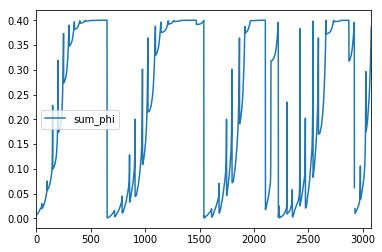

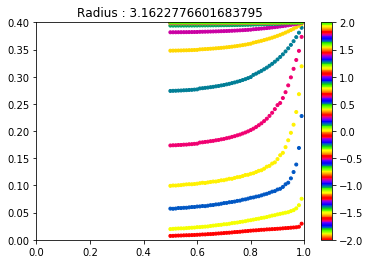

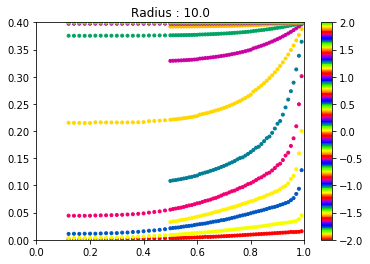

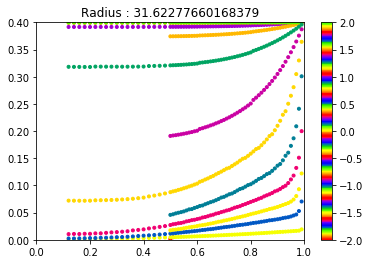

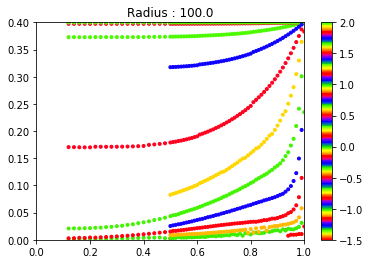

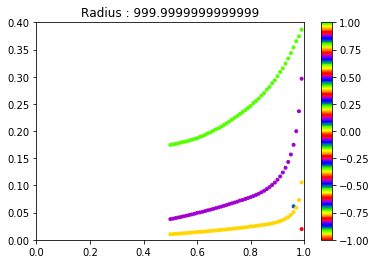

In [7]:
df.plot(y="sum_phi", use_index=True)
error=1e-12

def select_unique(dataframe):
    values = dataframe.unique()
    keep_values = np.abs(np.diff(values))>error
    keep_values = np.insert(keep_values,0,True)
    return values[keep_values]

coeff_1 = df[df["Ric_adim"]==100.]
coeff_01 = df[df["Ric_adim"]==10**1.5]
coeff_10 = df[df["Ric_adim"]==10.]


#markers = ["x", "v","^"]
# fig, ax = plt.subplots()

radii = select_unique(df["Ric_adim"])

for radius in (radii):
    values = df[np.abs(df["Ric_adim"]-radius)<error]
    fig, ax = plt.subplots()
    sc = ax.scatter(values["r0_supercooling"]/values["Ric_adim"], values["sum_phi"], 
               c= np.log10(values['coeff_velocity']), 
               marker='.',  cmap=plt.cm.get_cmap("prism"))
    fig.colorbar(sc)
    ax.set_ylim([0, 0.4])
    ax.set_xlim([0, 1])
    ax.set_title("Radius : {}".format(radius))



Looking through folder /home/lasbleis-m/Research/output_mush/supercooling_r100/


/home/lasbleis-m/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


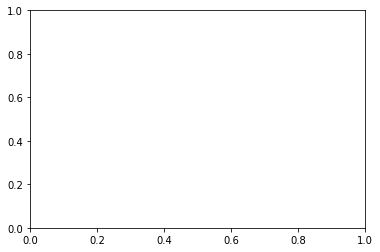

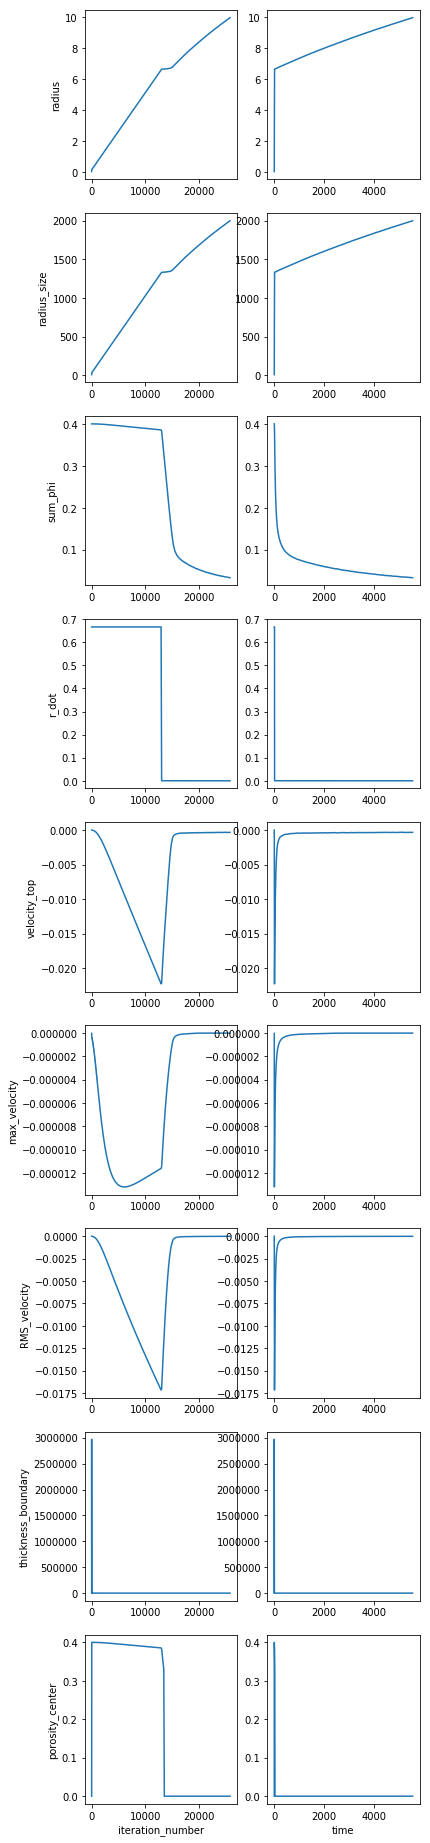

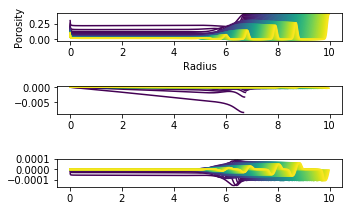

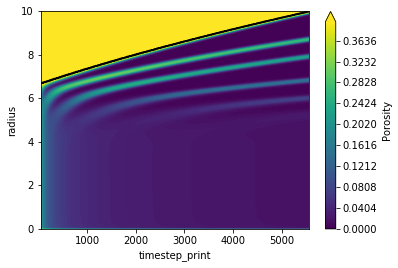

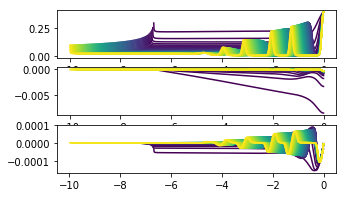

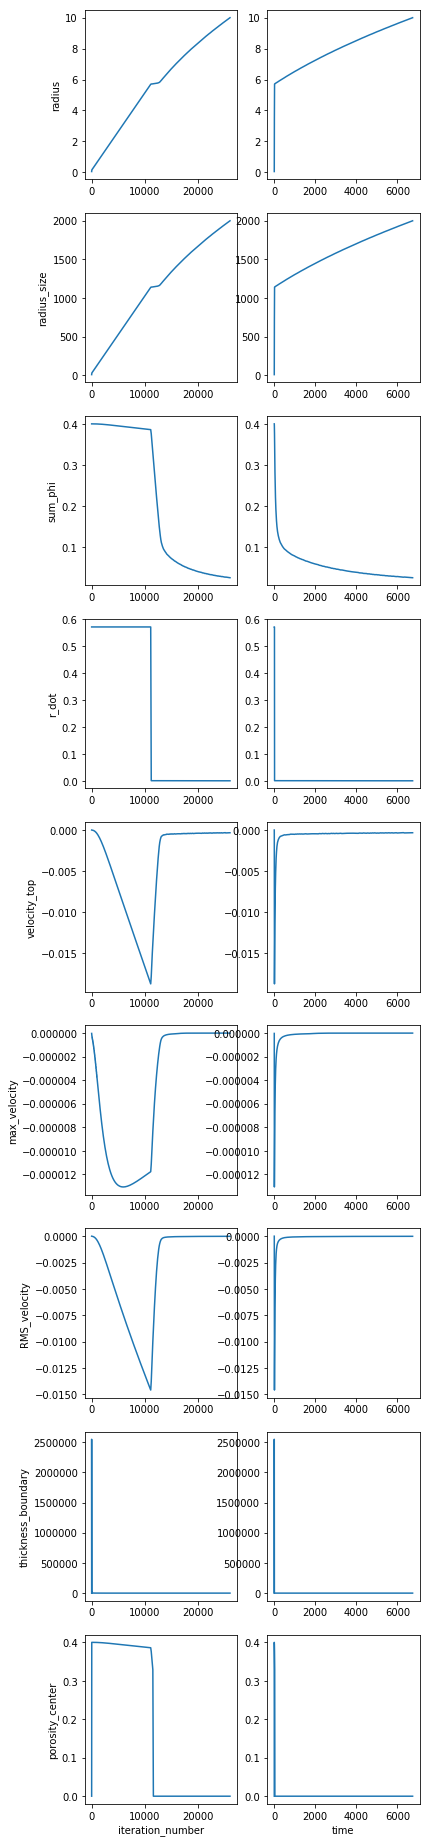

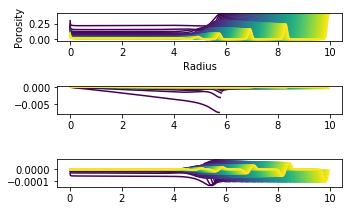

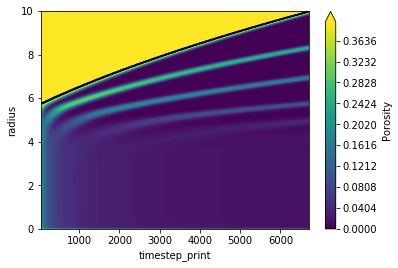

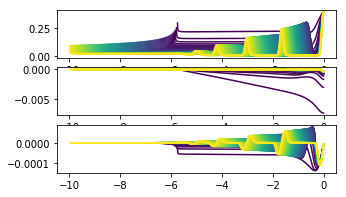

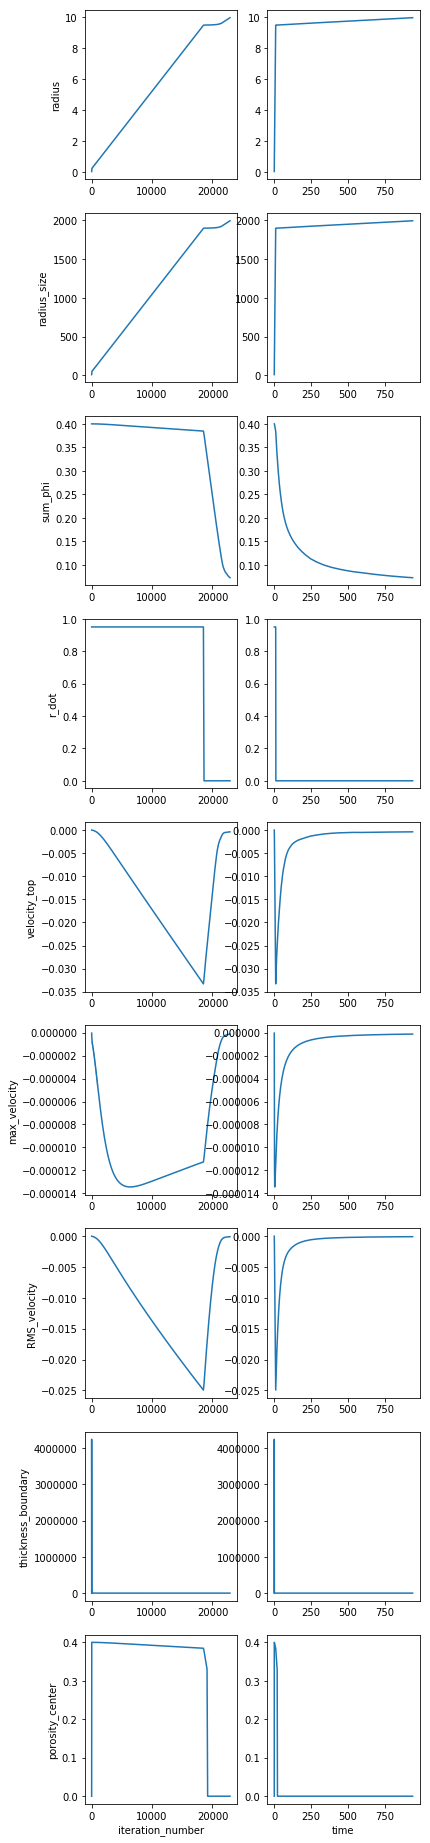

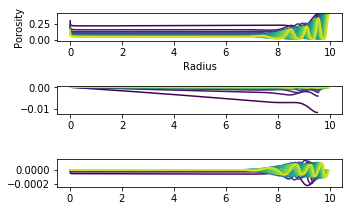

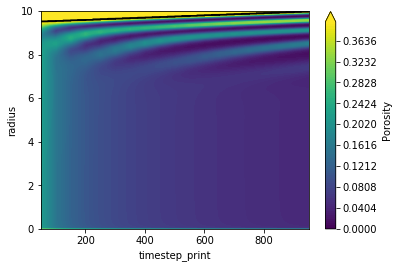

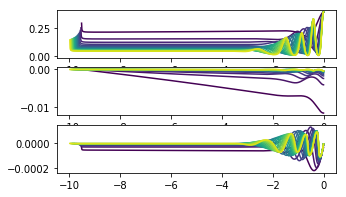

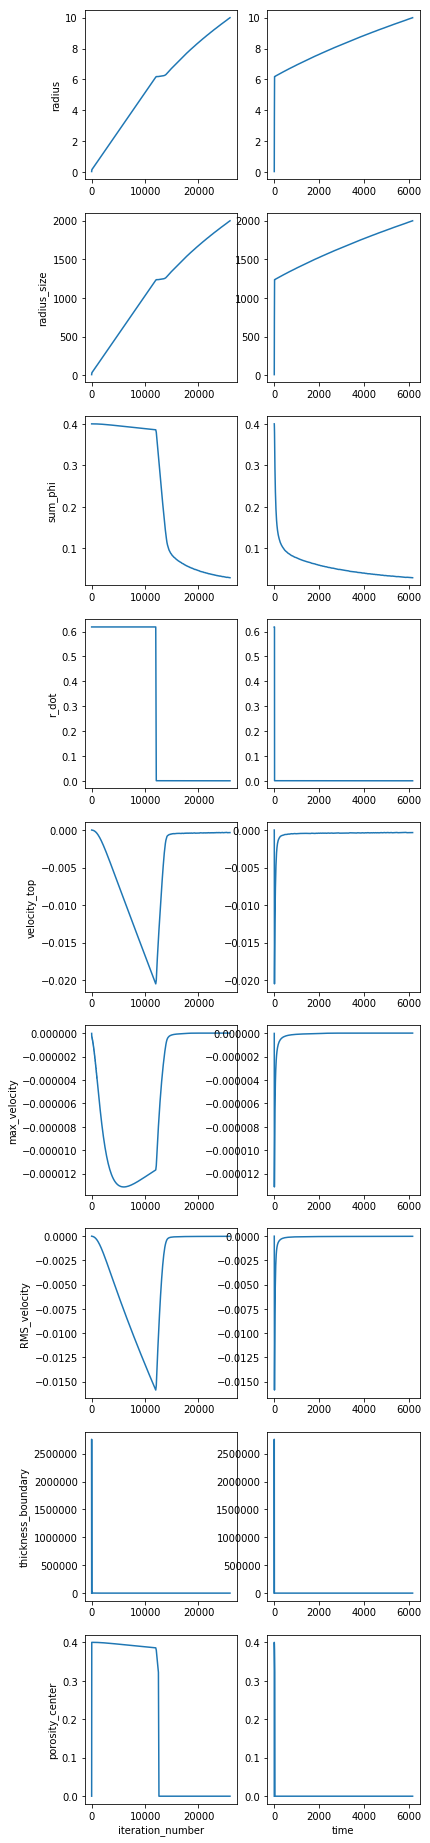

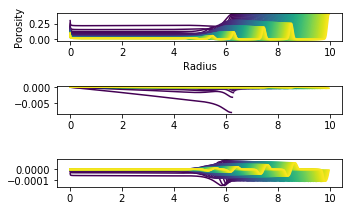

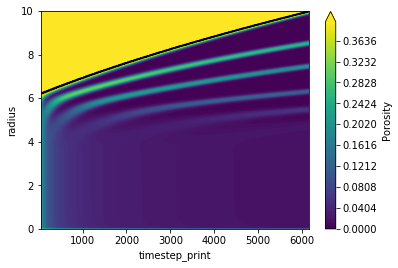

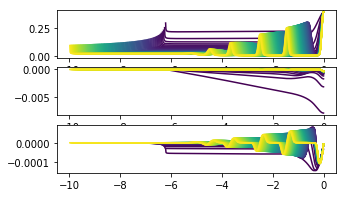

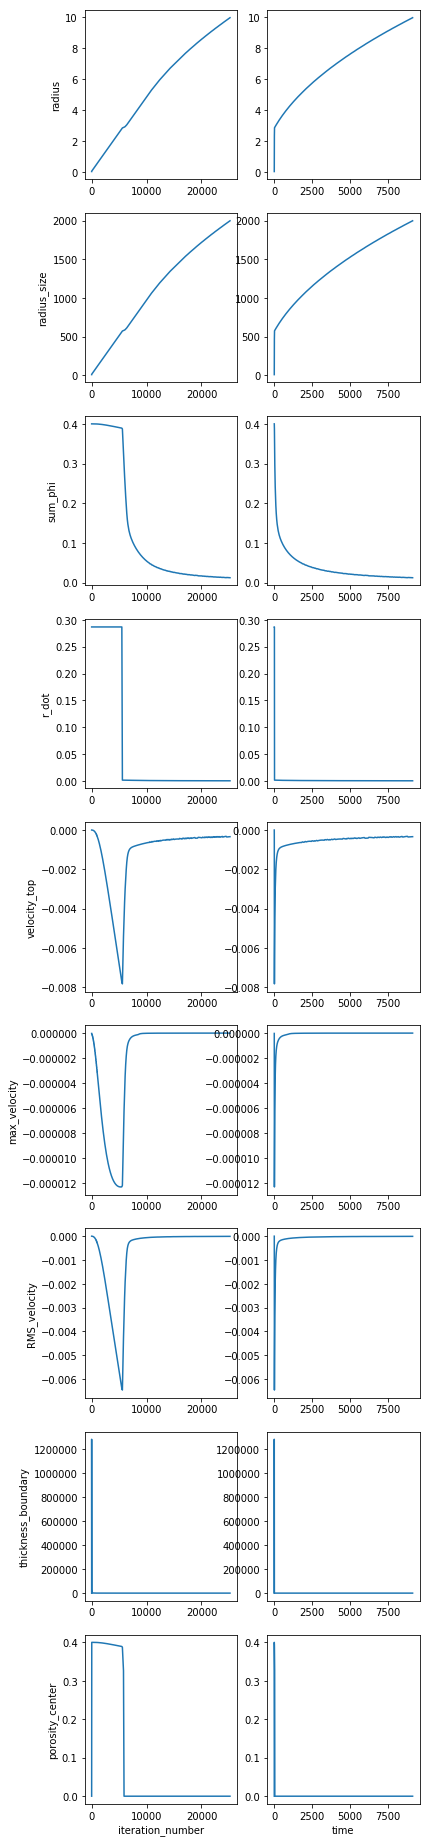

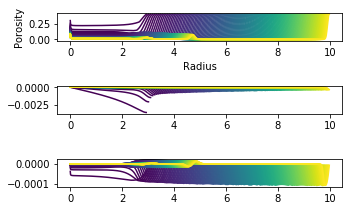

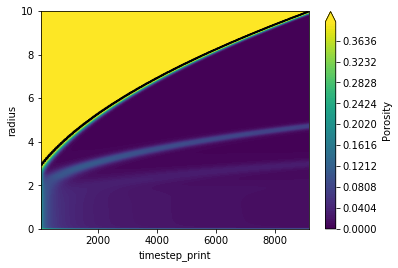

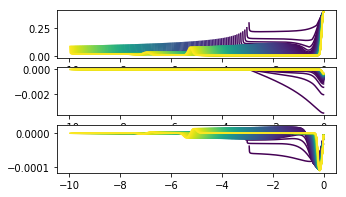

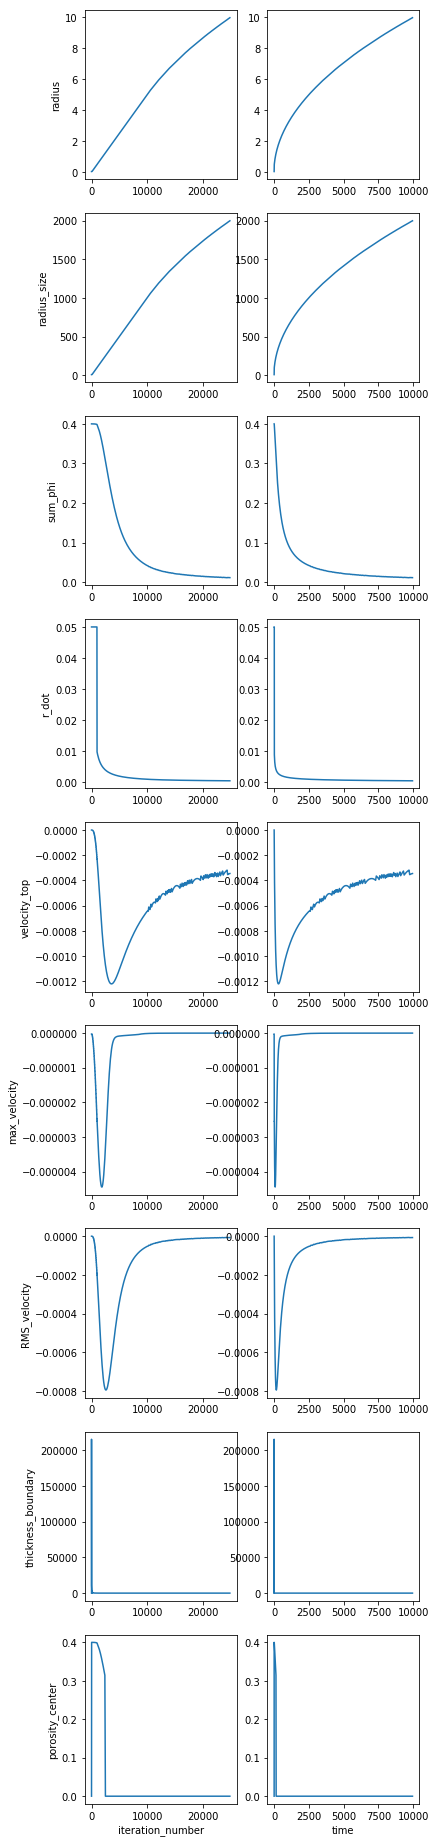

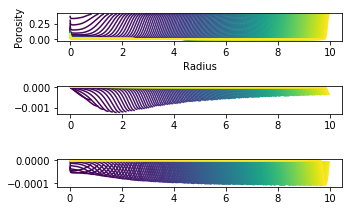

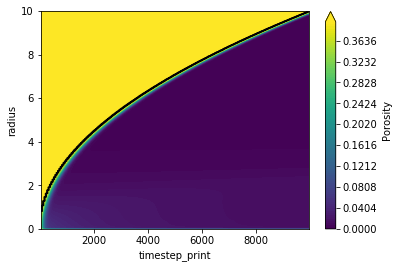

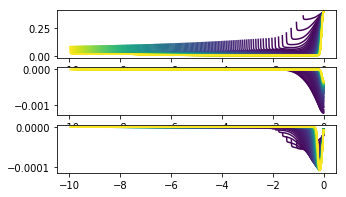

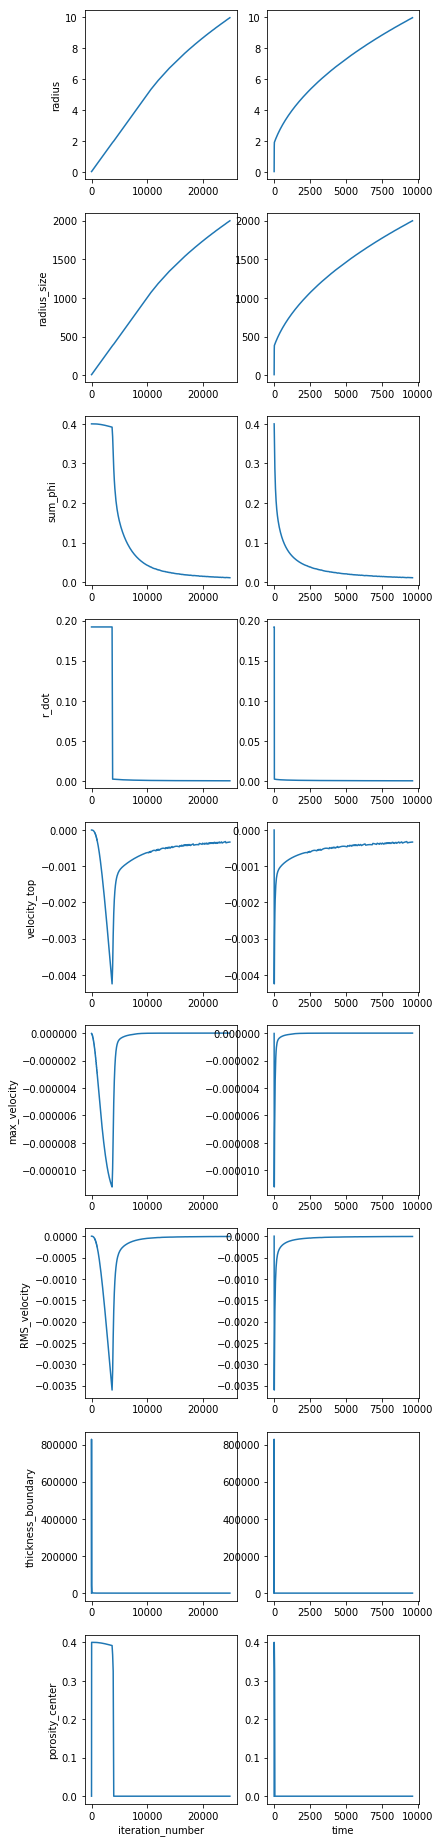

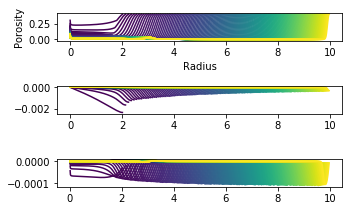

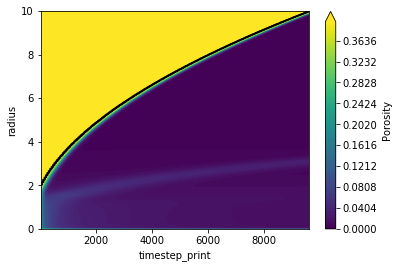

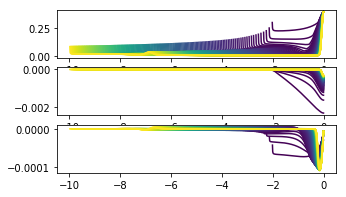

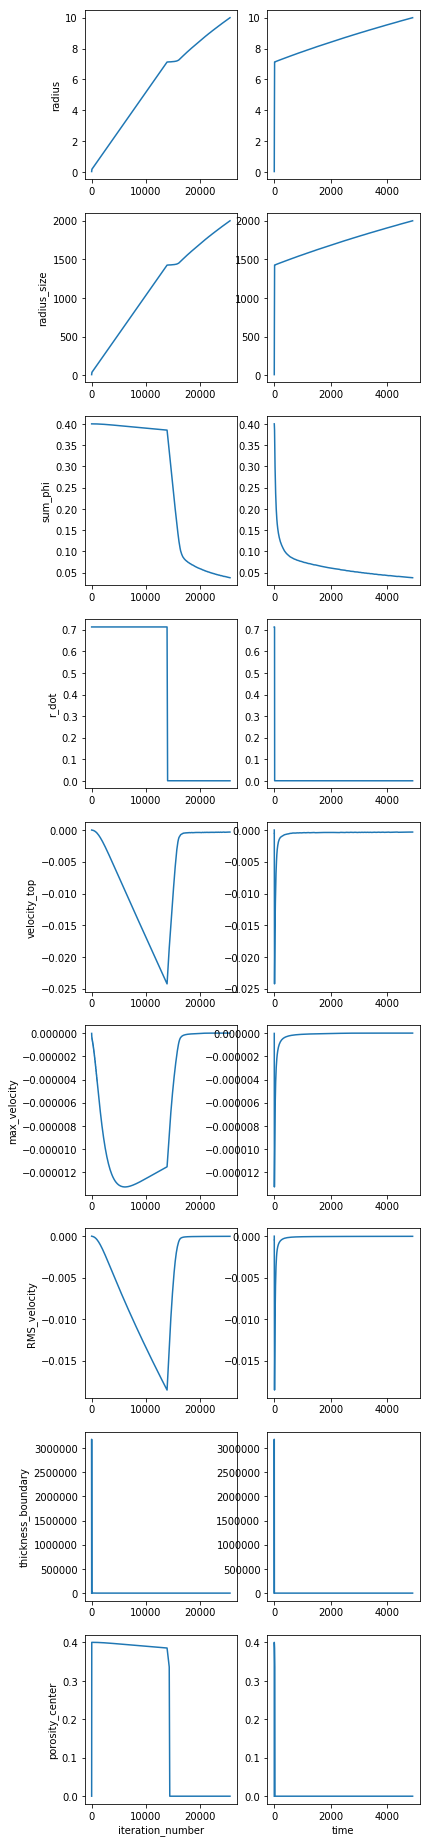

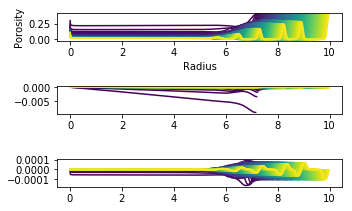

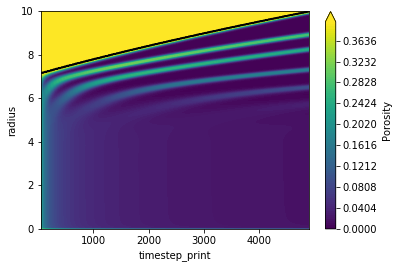

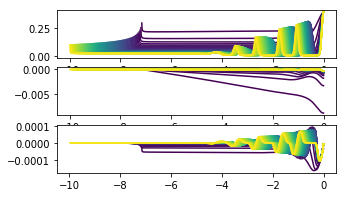

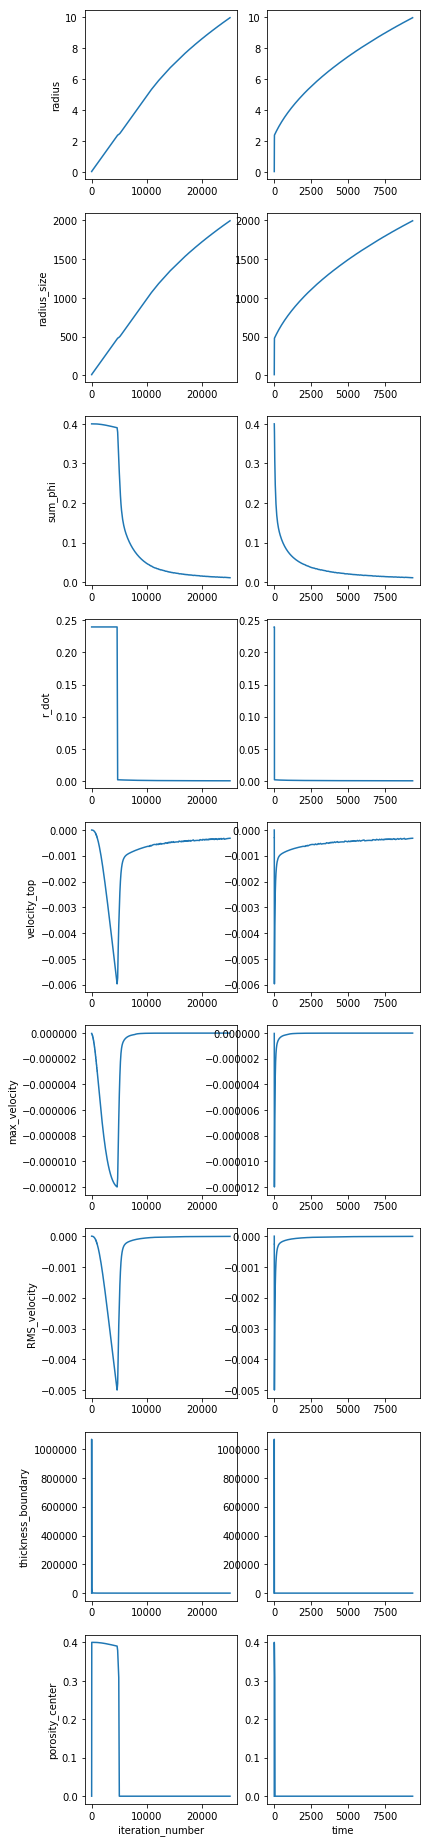

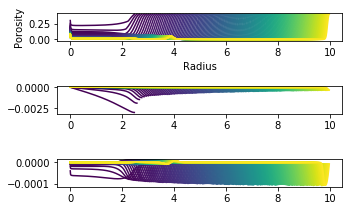

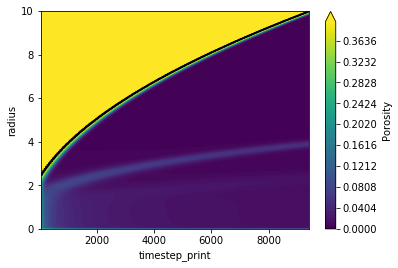

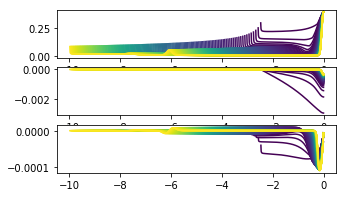

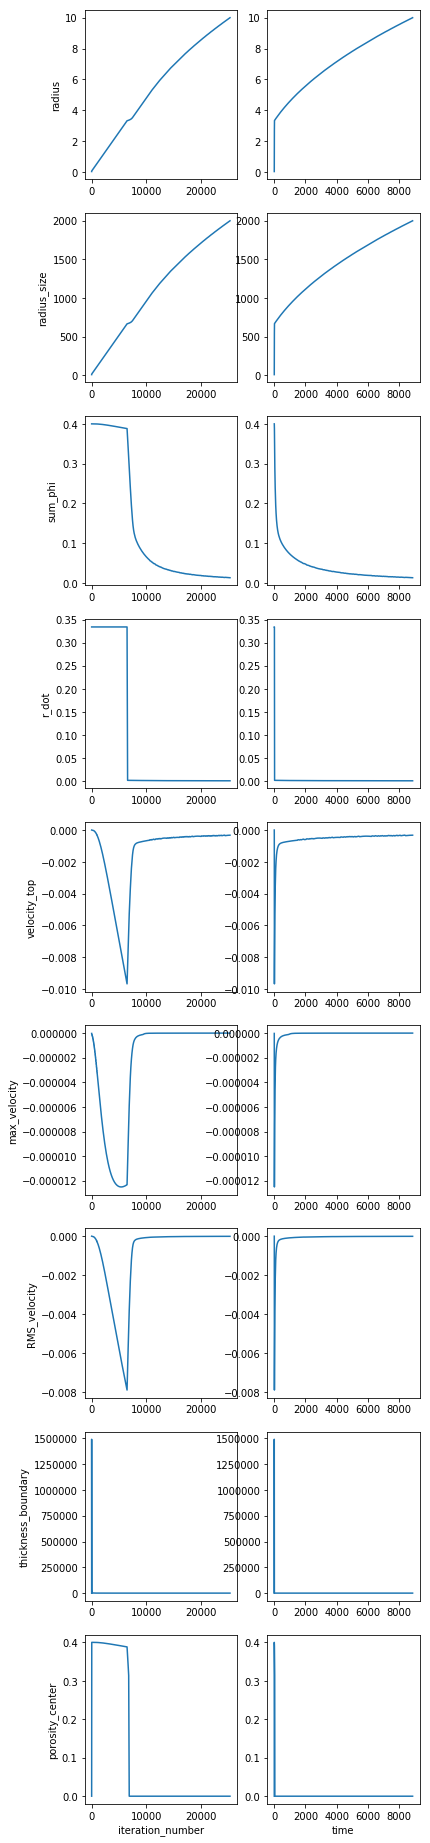

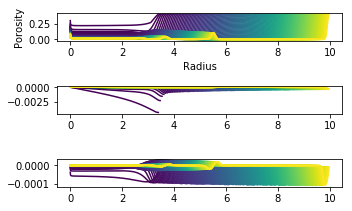

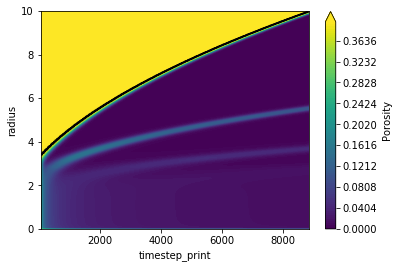

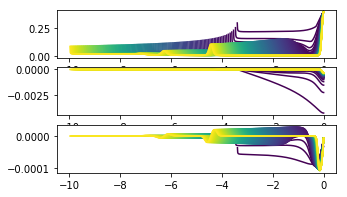

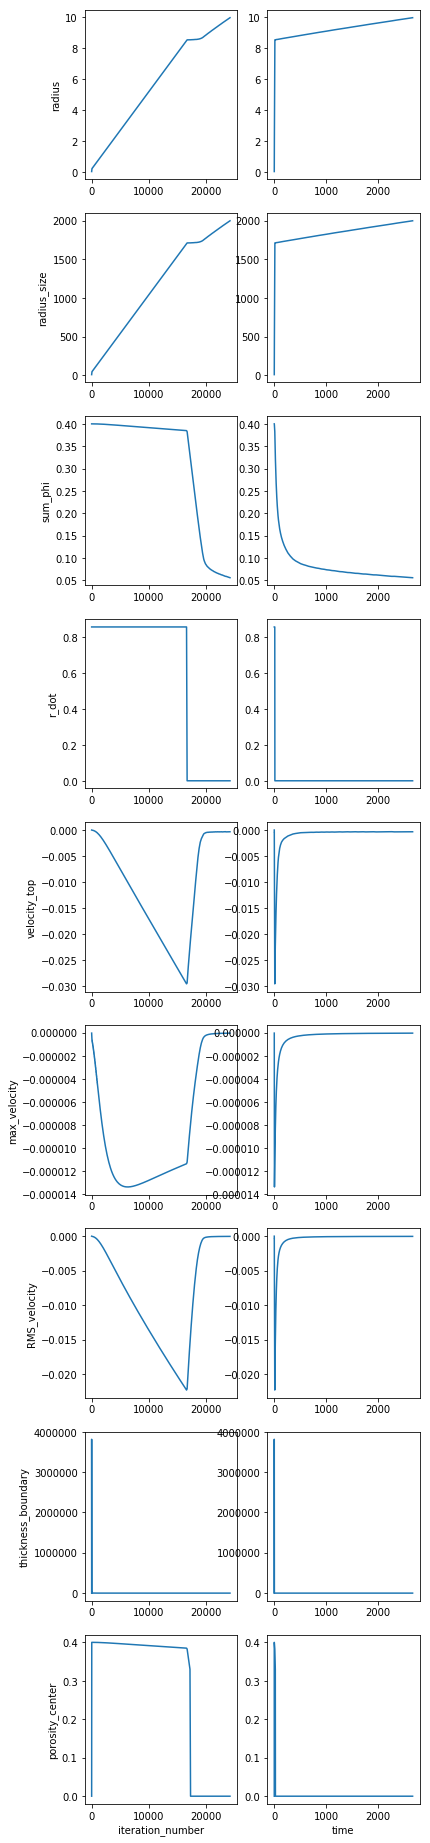

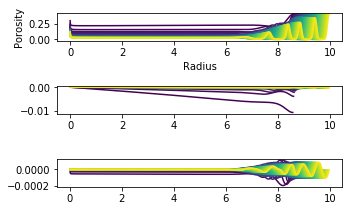

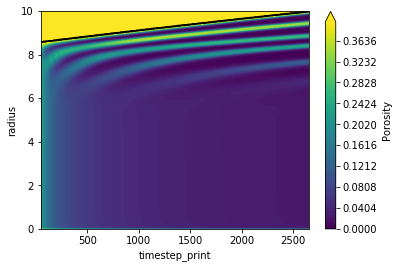

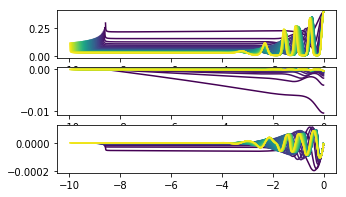

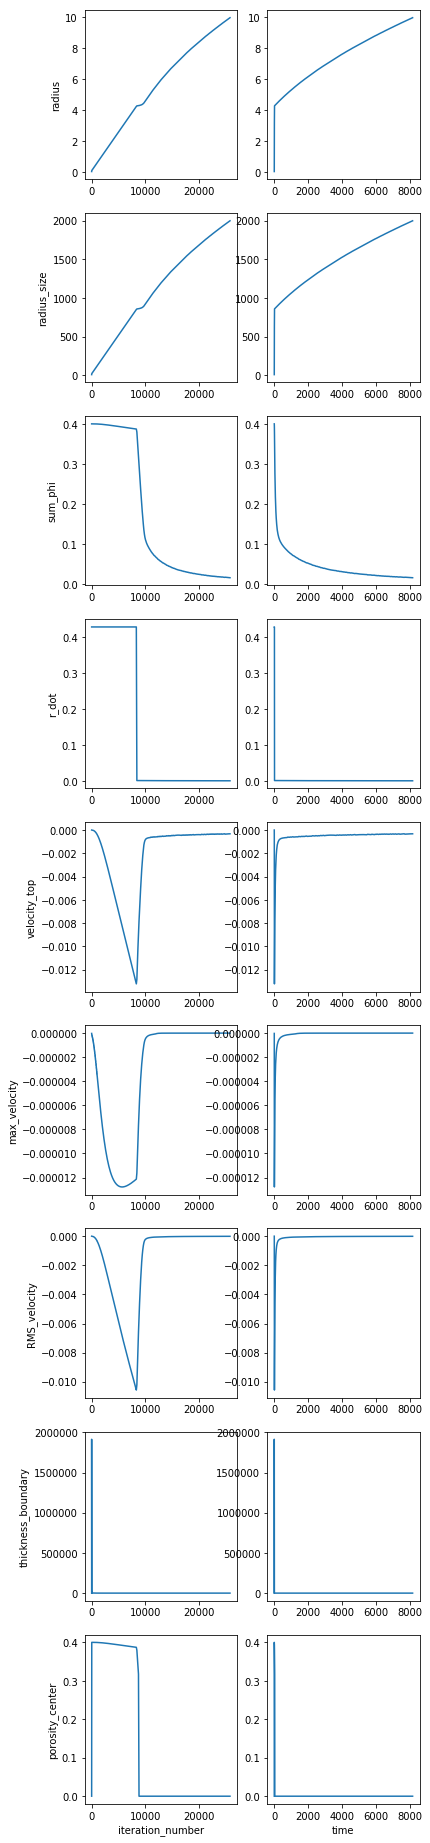

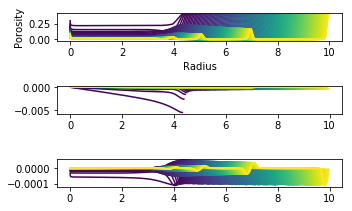

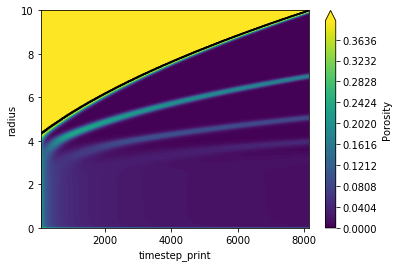

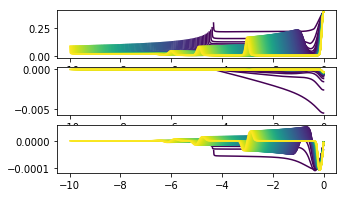

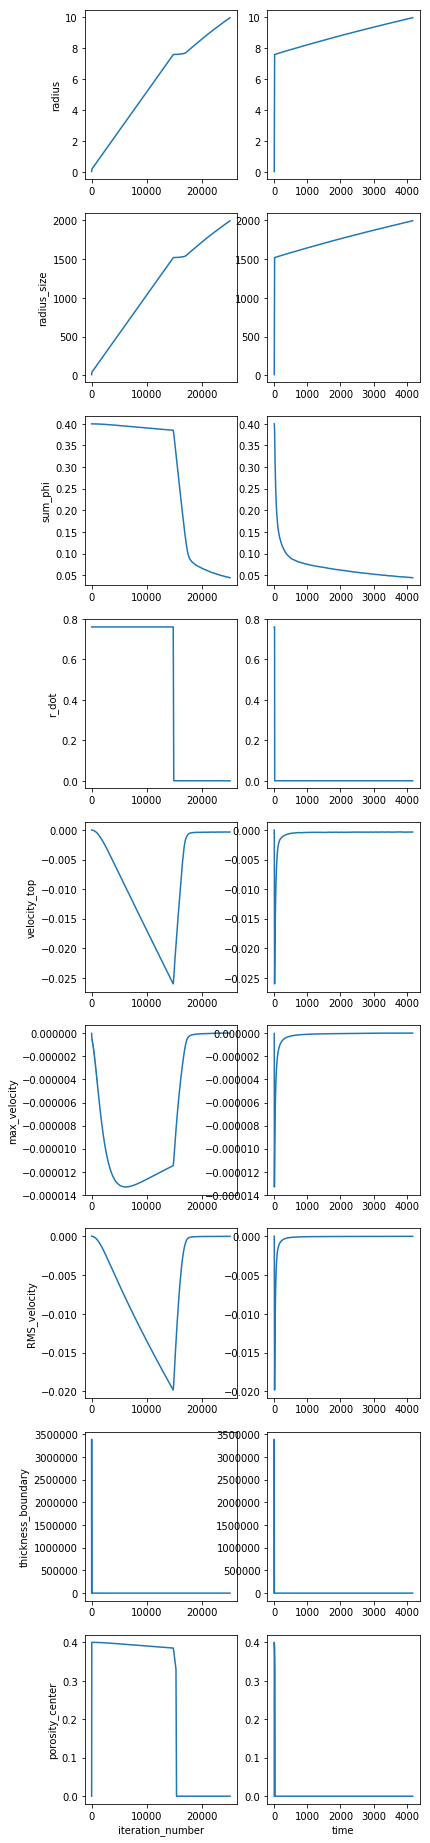

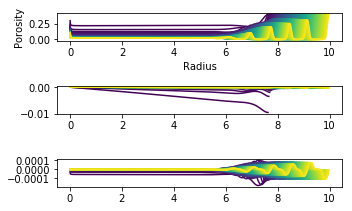

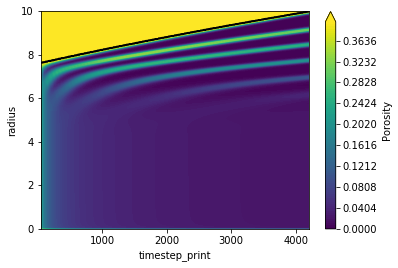

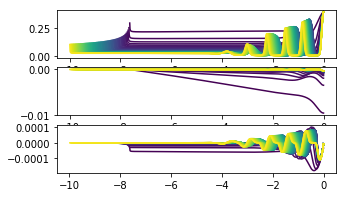

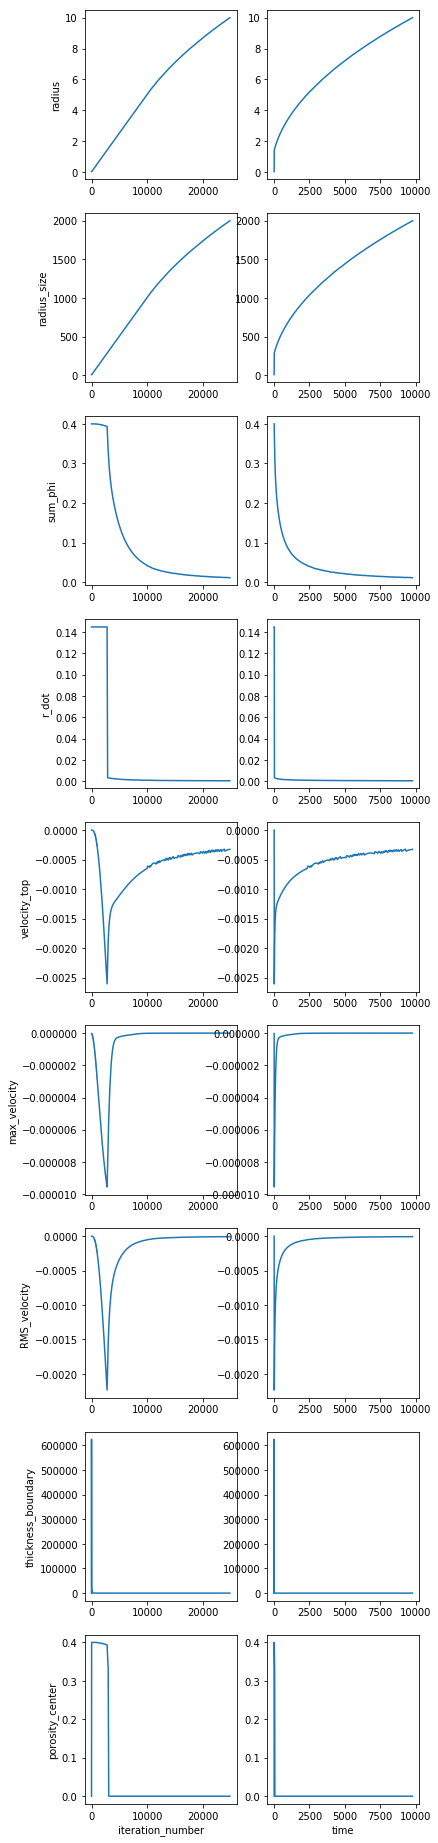

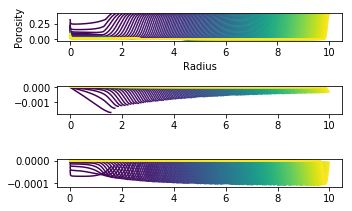

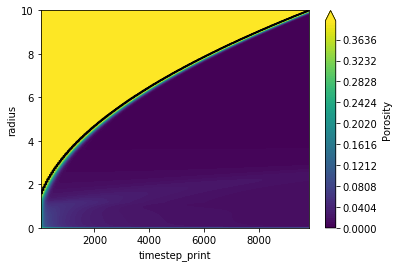

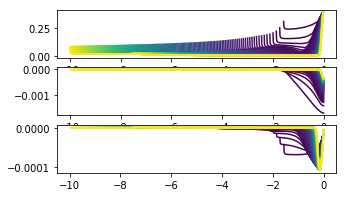

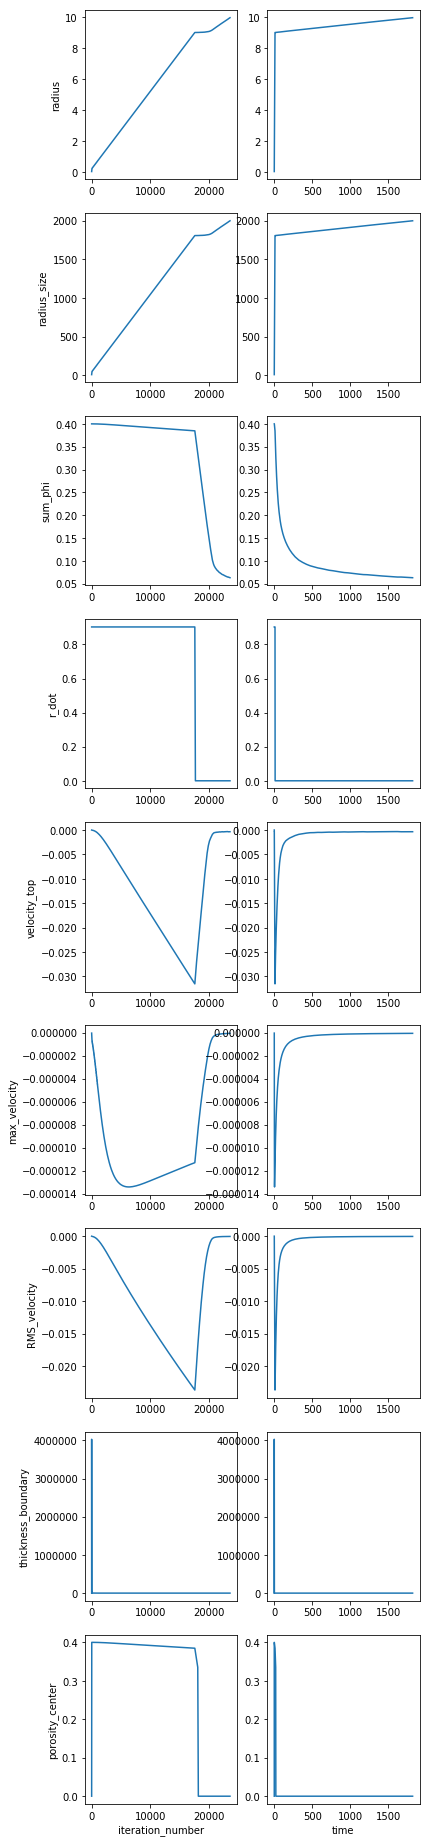

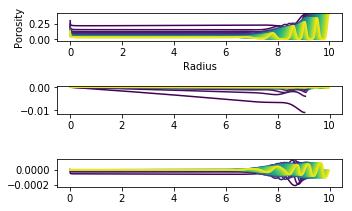

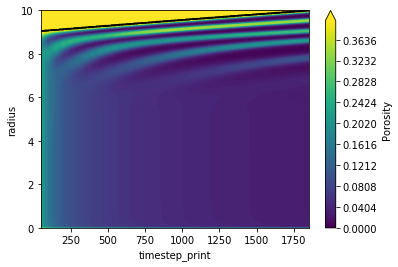

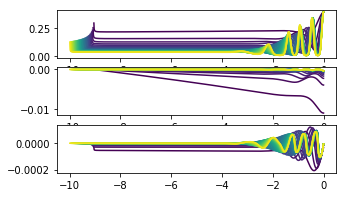

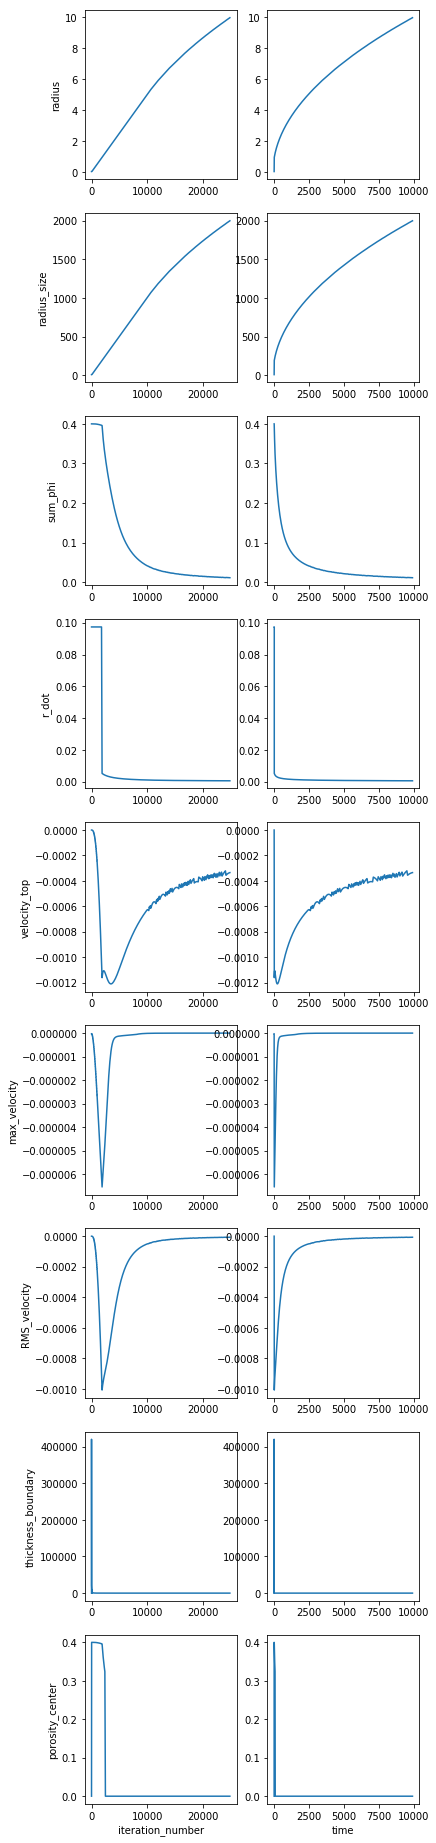

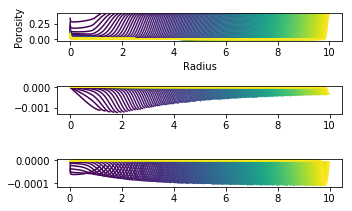

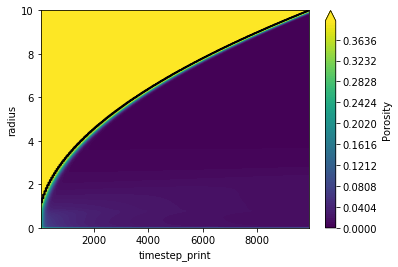

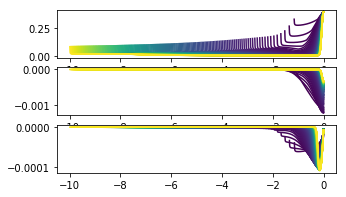

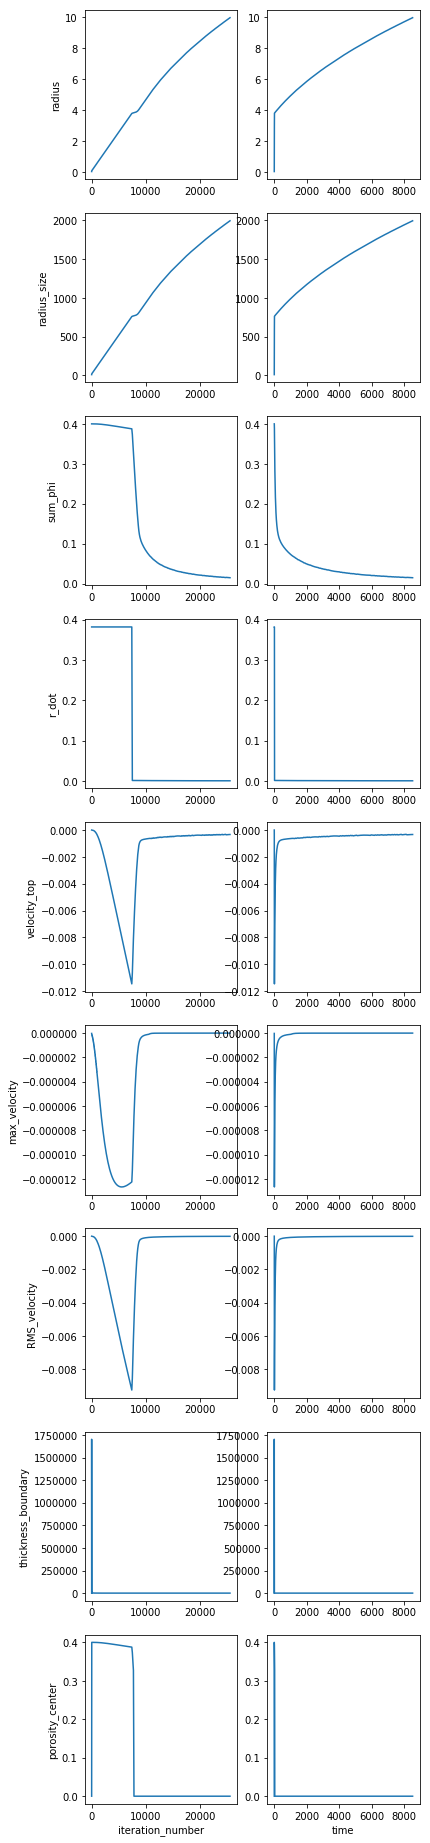

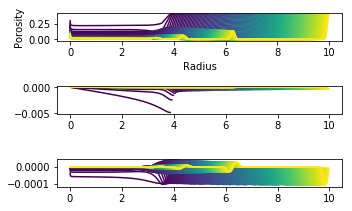

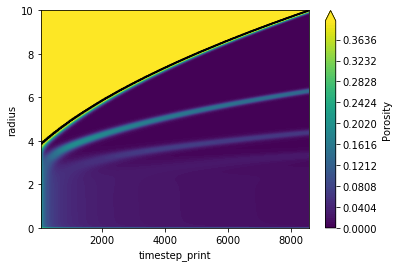

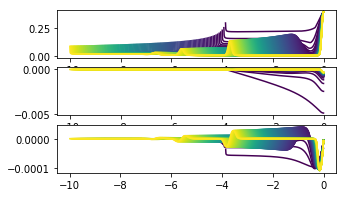

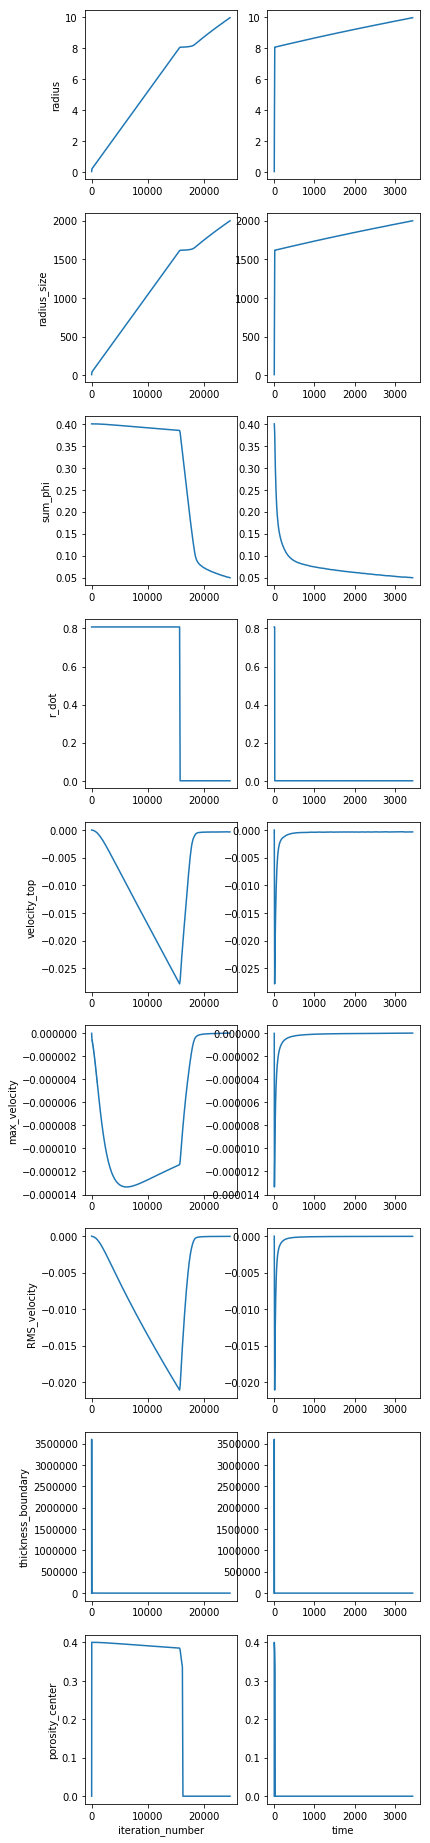

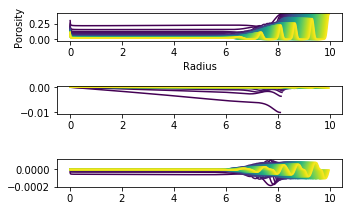

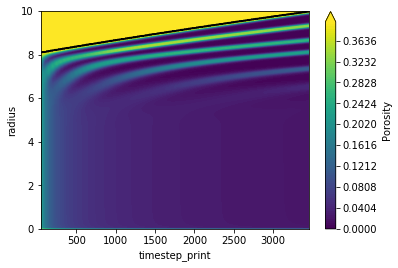

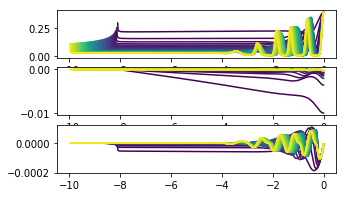

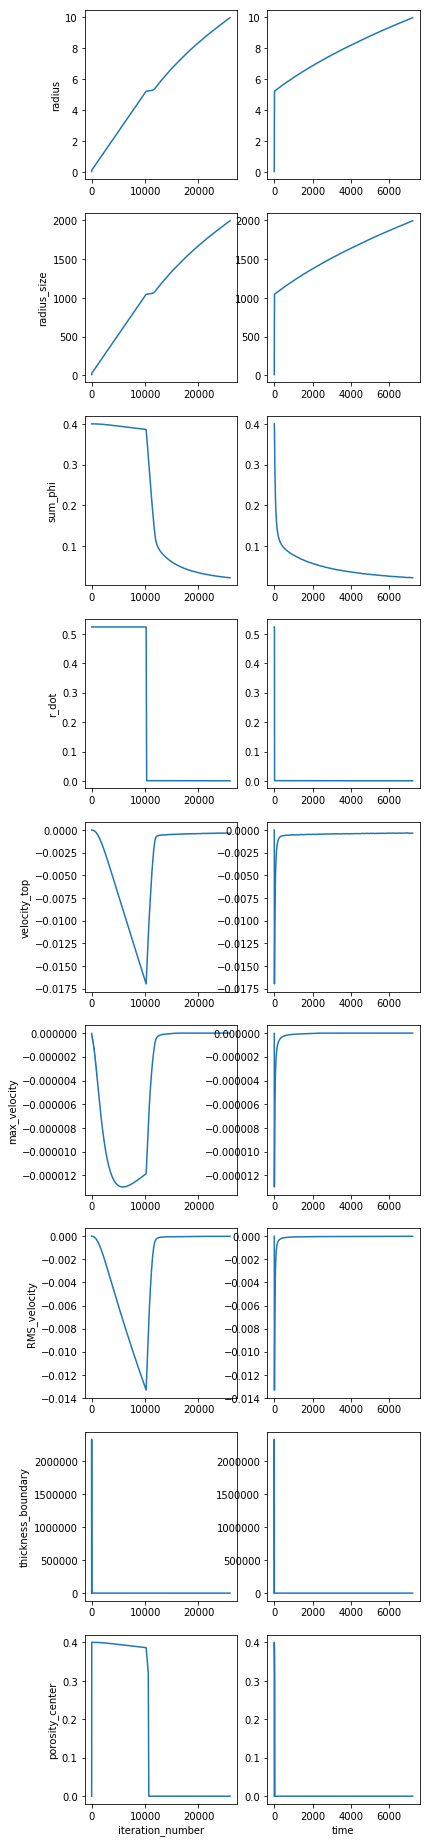

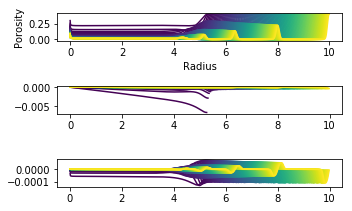

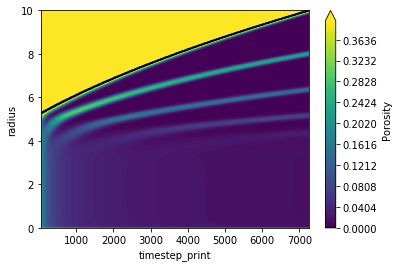

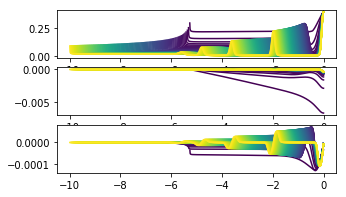

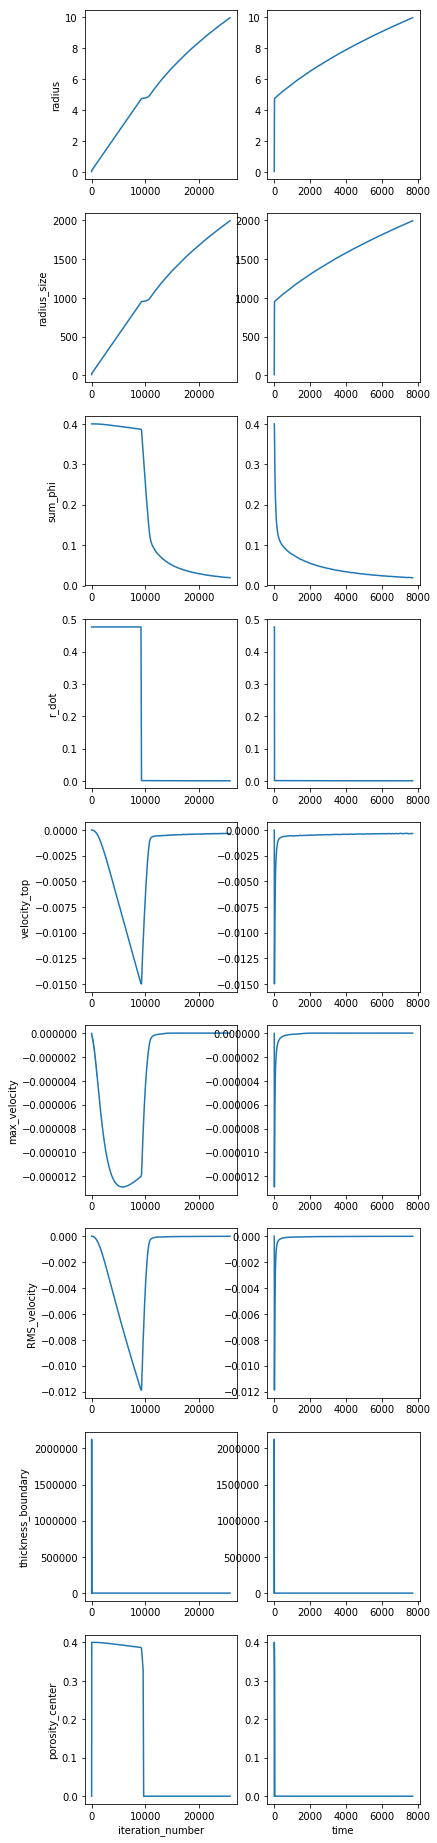

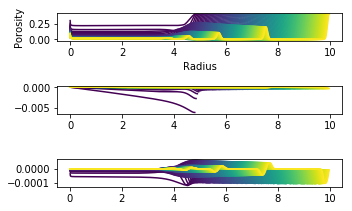

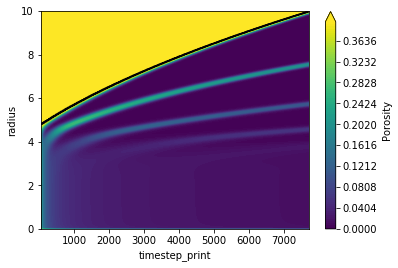

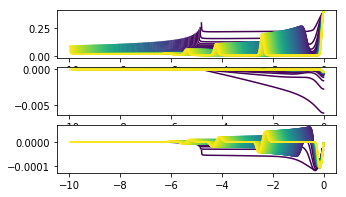

In [5]:
folder_main = "/home/lasbleis-m/Research/output_mush/supercooling_r100/"
list_subfolder = os.listdir(folder_main)
print("Looking through folder {}".format(folder_main))

import operator
fig, ax = plt.subplots()

for folder in list_subfolder: 
    file_stat, param, timesteps = figures.extract_files(folder_main+folder)
    figures.all_figures(folder_main+folder, verbose=False)
    if param["r0_supercooling"]>0:
        if timesteps != {}: 
            file = (max(timesteps))
            #stats = {'a':1000, 'b':3000, 'c': 100}
            file = max(timesteps.items(), key=operator.itemgetter(1))[0]
            #print(file)
            data = pd.read_csv(file, sep=" ")
            #Porosity = np.array(data["porosity"].values)
            #N_r = len(Porosity)
            dr = data["radius"][1]-data["radius"][0]
            #ax.plot(data["radius"] + dr / 2., (data["porosity"]), label="t = {:.1f}".format(time))
            #ax.plot( float(param["r0_supercooling"])*np.array([1., 1.]), [0, 0.4])